# Hi!

this is about Employee Churn classification models for a variety of business settings. 
will make predictions with the Random Forest, Gradient Boosting Descent, KNN algorithms.
will deploy model using *Streamlit*.

# #Determines
We have HR data of a company. A study is requested to predict which employee will churn by using this data.
Dataset has 14,999 samples. In the given dataset, i have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Matrix*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.

# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [ ]:
dabl.plot(data, target_col='left')

In [1]:
!pip install dabl sweetviz



     |████████████████████████████████| 566 kB 5.1 MB/s eta 0:00:01
  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572786 sha256=e6455bbbf2d34fdad3643c378f1b1bb47a48b7452b13d1c4365b2fb89a3aa02e
  Stored in directory: /Users/me/Library/Caches/pip/wheels/63/d2/62/c3ee6bbd1c1f0d7b7d9dbb96a4f5d59c35c08c70662d7695aa
Successfully built dabl


### Importing Modules

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#EDA libraries
import dabl
import sweetviz as sw
import pandas_profiling


### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [3]:
df = pd.read_csv('HR_Dataset.csv')
df.rename({'Departments ':'Departments'}, axis='columns',inplace=True)
df
# at actual csv there was a ' ' in the Departments so i have deleted it.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Target looks like classification
Linear Discriminant Analysis training set score: 0.589


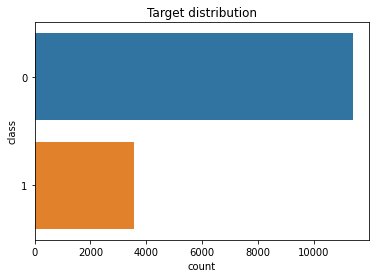

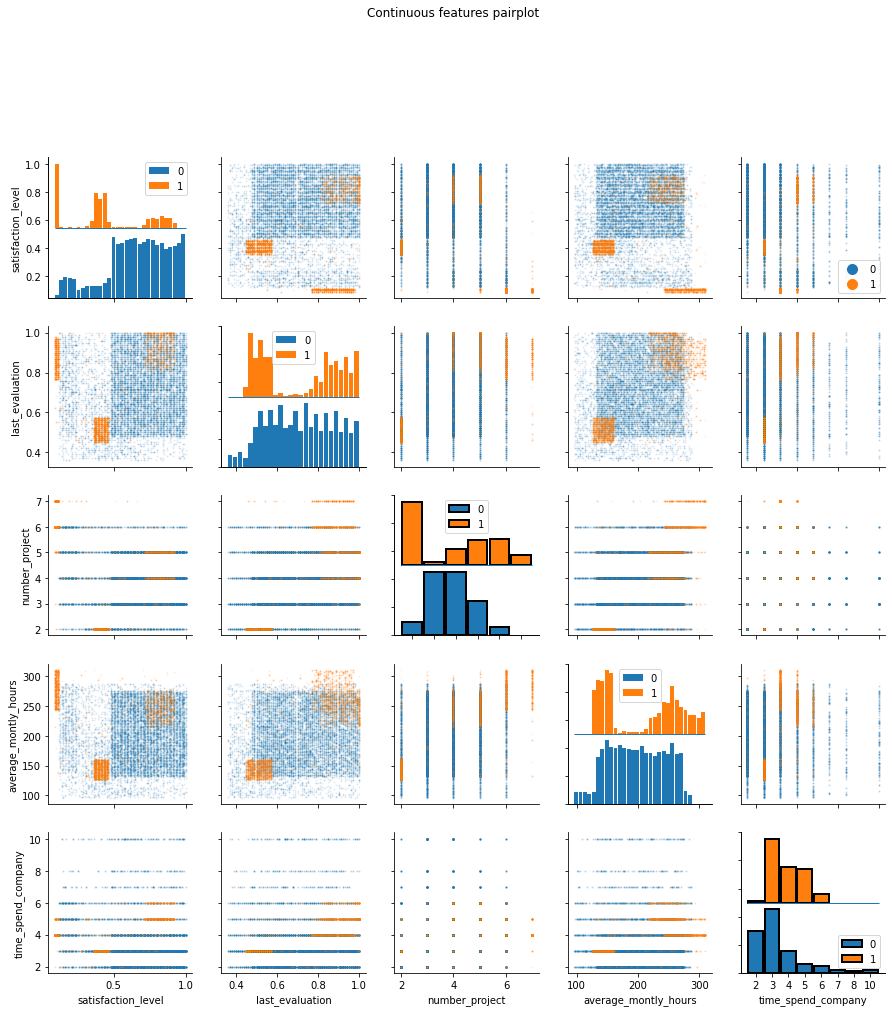

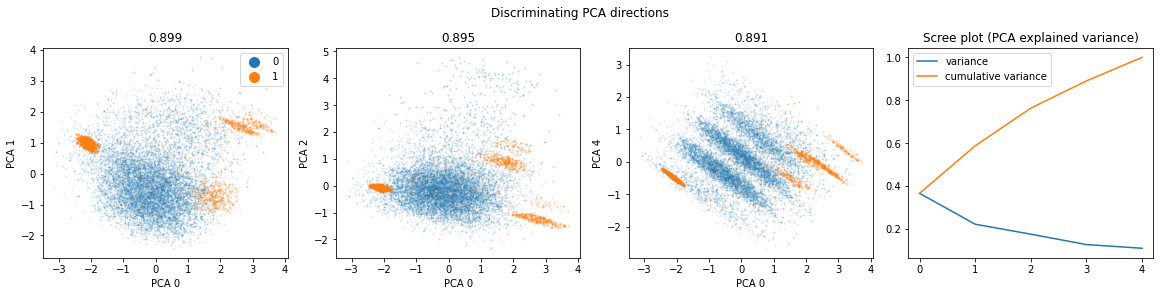

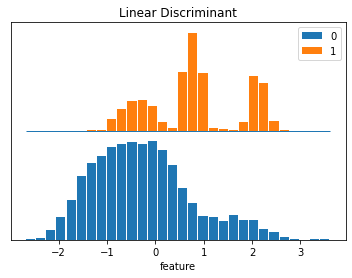

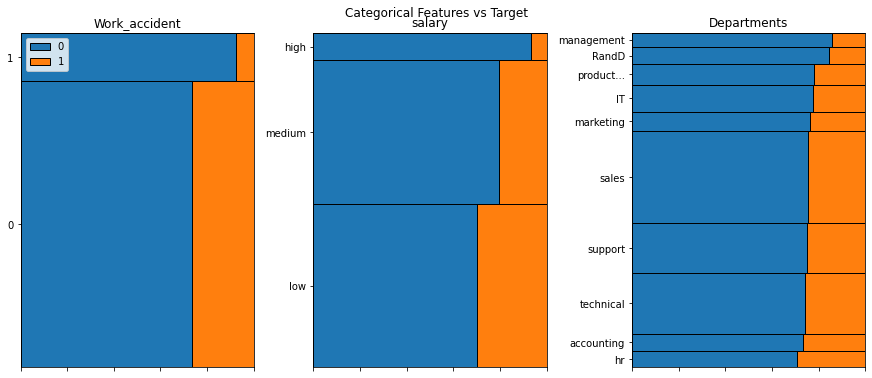

In [4]:
dabl.plot(df, target_col='left')

In [7]:
report = sw.analyze(df)
report.show_html('eda_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
pandas_profiling.ProfileReport(df)


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [7]:
df[df['left'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,3571.0,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92
last_evaluation,3571.0,0.718113,0.197673,0.45,0.52,0.79,0.90,1.00
number_project,3571.0,3.855503,1.818165,2.00,2.00,4.00,6.00,7.00
average_montly_hours,3571.0,207.419210,61.202825,126.00,146.00,224.00,262.00,310.00
time_spend_company,3571.0,3.876505,0.977698,2.00,3.00,4.00,5.00,6.00
Work_accident,3571.0,0.047326,0.212364,0.00,0.00,0.00,0.00,1.00
left,3571.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,3571.0,0.005321,0.072759,0.00,0.00,0.00,0.00,1.00


In [8]:
df[df['left'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11428.0,0.666810,0.217104,0.12,0.54,0.69,0.84,1.0
last_evaluation,11428.0,0.715473,0.162005,0.36,0.58,0.71,0.85,1.0
number_project,11428.0,3.786664,0.979884,2.00,3.00,4.00,4.00,6.0
average_montly_hours,11428.0,199.060203,45.682731,96.00,162.00,198.00,238.00,287.0
time_spend_company,11428.0,3.380032,1.562348,2.00,2.00,3.00,4.00,10.0
Work_accident,11428.0,0.175009,0.379991,0.00,0.00,0.00,0.00,1.0
left,11428.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
promotion_last_5years,11428.0,0.026251,0.159889,0.00,0.00,0.00,0.00,1.0


In [9]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("-"*29)

satisfaction_level
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.12     30
0.26     30
Name: satisfaction_level, Length: 92, dtype: int64
-----------------------------
last_evaluation
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64
-----------------------------
number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64
-----------------------------
average_montly_hours
156    153
135    153
149    148
151    147
160    136
      ... 
297      7
303      6
288      6
299      6
96       6
Name: average_montly_hours, Length: 215, dtype: int64
-----------------------------
time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64
-----------------------------


## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


### Subplots of Features

You can use the methods of the matplotlib.

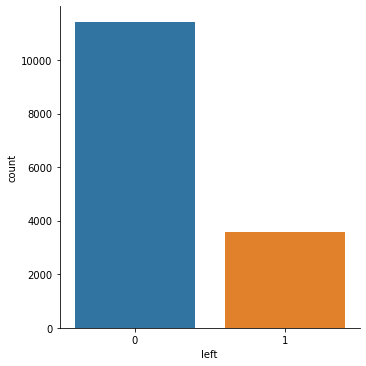

In [10]:
sns.catplot(x='left',data=df,kind='count')
#most of the employees didnt leave.

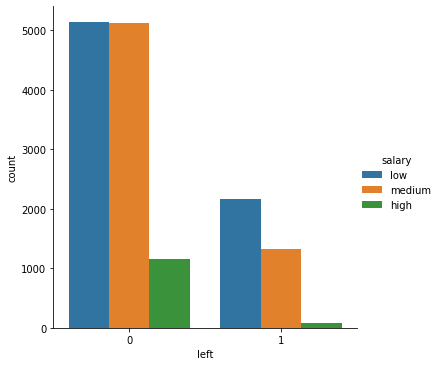

In [11]:
sns.catplot(x='left',data=df,kind='count',hue='salary')
# Left ones were not getting high salaries.

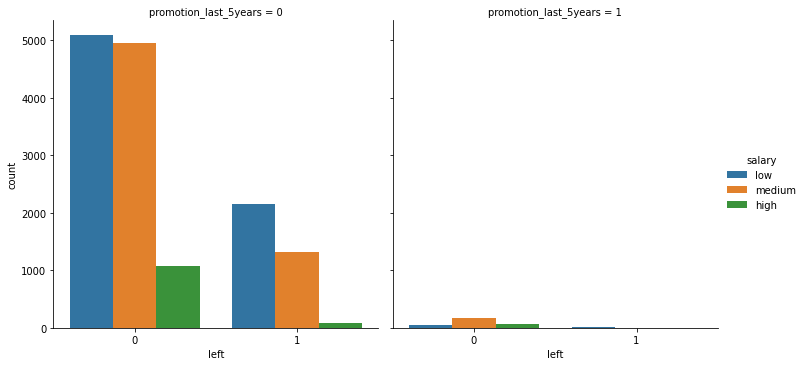

In [12]:
sns.catplot(x='left',data=df,kind='count',hue='salary',col='promotion_last_5years')
# Who gets promotion last 5 year most probably didnt leave.

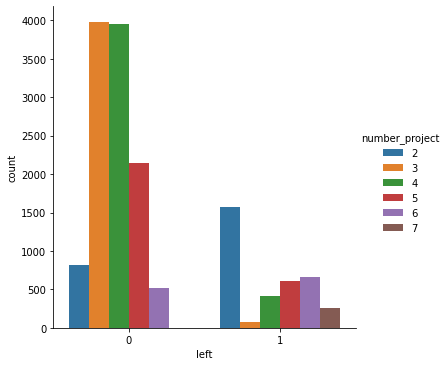

In [13]:
sns.catplot(x='left',data=df,kind='count',hue='number_project')
# 7 project made people to leave company :) so 6 is enough :P

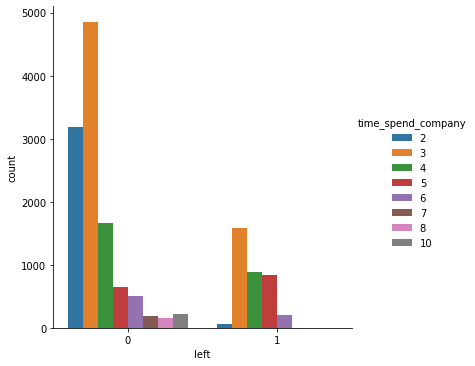

In [14]:
sns.catplot(x='left',data=df,kind='count',hue='time_spend_company')
# 3-4-5 years of working is the most left ones.

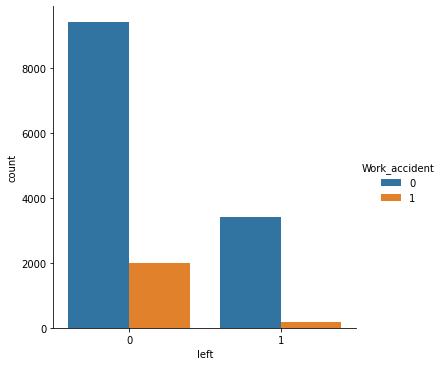

In [15]:
sns.catplot(x='left',data=df,kind='count',hue='Work_accident')
# having work accident make people stay :S

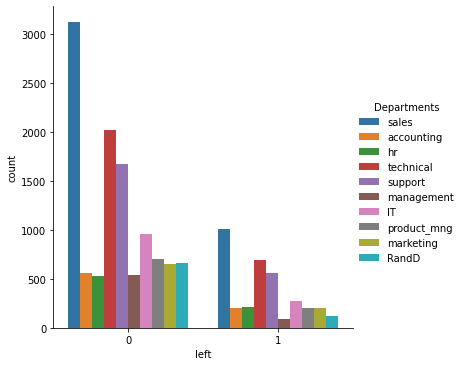

In [16]:
sns.catplot(x='left',data=df,kind='count',hue='Departments')
# not so much clear, almost proportional 0 and 1

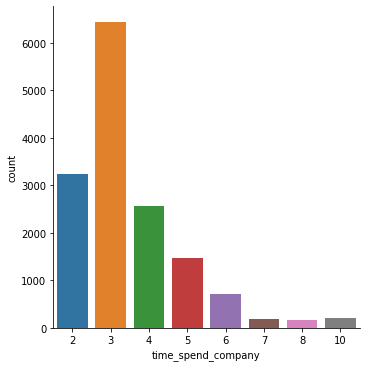

In [17]:
sns.catplot(x='time_spend_company',data=df,kind='count')
#kind of normal dist.

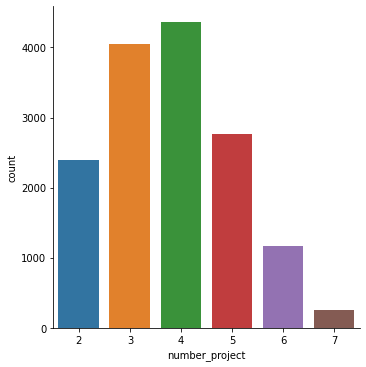

In [18]:
sns.catplot(x='number_project',data=df,kind='count')
#kind of normal dist.

## 3. Data Pre-Processing

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [22]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['salary'])
#le.classes_
df['salary'] = le.transform(df['salary'])
#le.inverse_transform(df['salary'])

In [119]:
le.classes_

array(['high', 'low', 'medium'], dtype=object)

In [32]:
df.salary.value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
salary,14999.0,1.347290,0.625819,0.00,1.00,1.00,2.00,2.0


In [56]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [57]:
df_cluster = pd.get_dummies(df)
df_cluster.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments_IT,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [58]:
from pyclustertend import hopkins
hopkins(df_cluster, df_cluster.shape[0])

0.2079679711627519

In [65]:
df_cluster.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
salary,14999.0,1.347290,0.625819,0.00,1.00,1.00,2.00,2.0
Departments_IT,14999.0,0.081805,0.274077,0.00,0.00,0.00,0.00,1.0


In [62]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)
df_cluster_scaled = pd.DataFrame(df_cluster_scaled,columns=df_cluster.columns)
df_cluster_scaled

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments_IT,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
df_cluster_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.574542,0.273220,0.0,0.384615,0.604396,0.802198,1.0
last_evaluation,14999.0,0.556409,0.267452,0.0,0.312500,0.562500,0.796875,1.0
number_project,14999.0,0.360611,0.246518,0.0,0.200000,0.400000,0.600000,1.0
average_montly_hours,14999.0,0.490889,0.233379,0.0,0.280374,0.485981,0.696262,1.0
time_spend_company,14999.0,0.187279,0.182517,0.0,0.125000,0.125000,0.250000,1.0
Work_accident,14999.0,0.144610,0.351719,0.0,0.000000,0.000000,0.000000,1.0
left,14999.0,0.238083,0.425924,0.0,0.000000,0.000000,0.000000,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.0,0.000000,0.000000,0.000000,1.0
salary,14999.0,0.673645,0.312910,0.0,0.500000,0.500000,1.000000,1.0
Departments_IT,14999.0,0.081805,0.274077,0.0,0.000000,0.000000,0.000000,1.0


## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)
    
#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

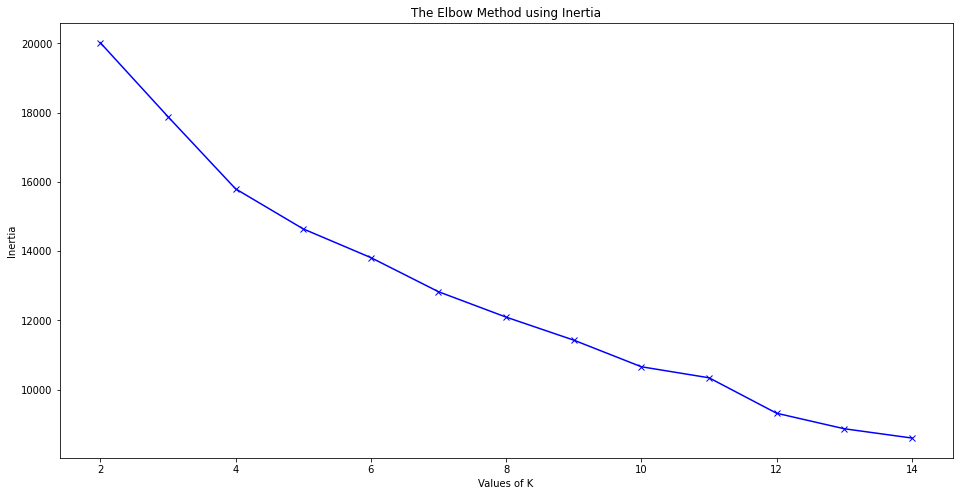

In [68]:
#df_cluster_scaled we may pick 10 or 12
from sklearn.cluster import KMeans
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster_scaled)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

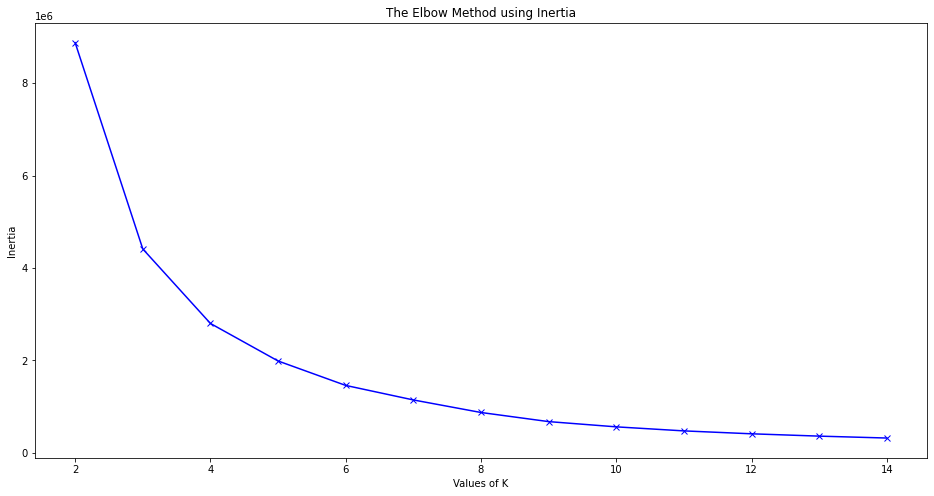

In [69]:
#df_cluster this look nice at 4 ;)
from sklearn.cluster import KMeans
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

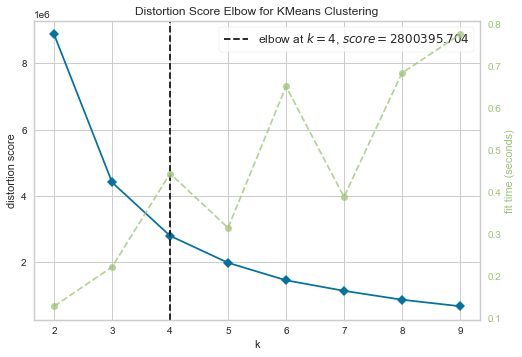

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_cluster)
visu.poof()

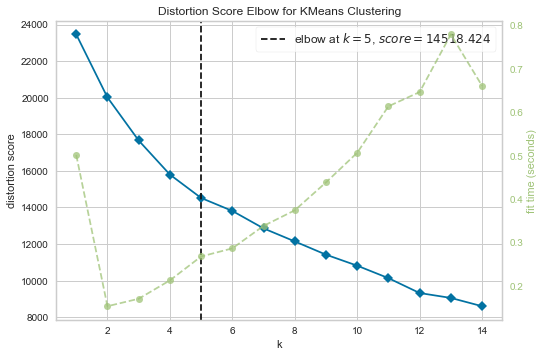

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,15))
visu.fit(df_cluster_scaled)
visu.poof()

In [45]:
#df.groupby('left').corr()

<AxesSubplot:>

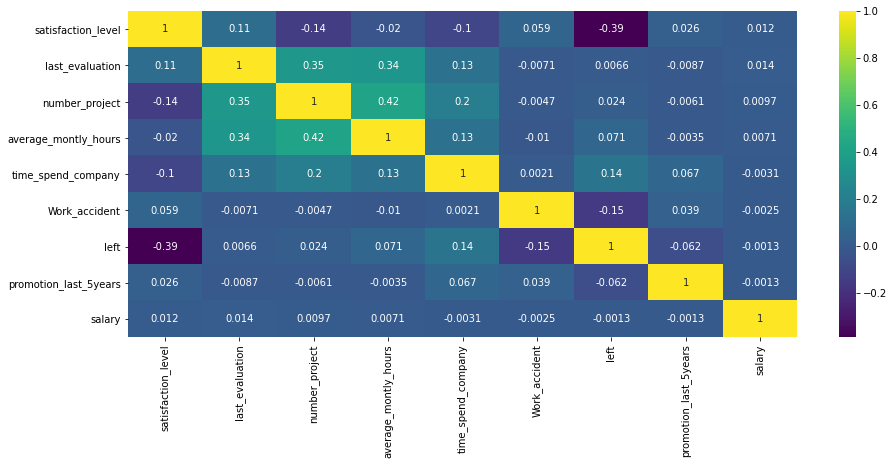

In [43]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [74]:
df_model = pd.get_dummies(df)
X = df_model.drop('left',axis=1)
y = df_model[['left']]
from sklearn.model_selection import train_test_split
from sklearn import datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [75]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Departments_IT,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,1,0,0,0,0,0,0,0,0,1,0


In [76]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       14999 non-null  float64
 1   last_evaluation          14999 non-null  float64
 2   number_project           14999 non-null  int64  
 3   average_montly_hours     14999 non-null  int64  
 4   time_spend_company       14999 non-null  int64  
 5   Work_accident            14999 non-null  int64  
 6   promotion_last_5years    14999 non-null  int64  
 7   salary                   14999 non-null  int64  
 8   Departments_IT           14999 non-null  uint8  
 9   Departments_RandD        14999 non-null  uint8  
 10  Departments_accounting   14999 non-null  uint8  
 11  Departments_hr           14999 non-null  uint8  
 12  Departments_management   14999 non-null  uint8  
 13  Departments_marketing    14999 non-null  uint8  
 14  Departments_product_mn

### #Gradient Boosting Classifier

#### Model Building

In [78]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 30/30 [00:37<00:00,  1.25s/it]


In [81]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.99,0.98,0.98,0.99,0.83
XGBClassifier,0.99,0.98,0.98,0.99,0.60
BaggingClassifier,0.99,0.98,0.98,0.99,0.40
ExtraTreesClassifier,0.99,0.98,0.98,0.99,0.68
LGBMClassifier,0.99,0.98,0.98,0.99,0.24
DecisionTreeClassifier,0.98,0.97,0.97,0.98,0.06
LabelSpreading,0.98,0.97,0.97,0.98,12.77
LabelPropagation,0.98,0.97,0.97,0.98,8.11
ExtraTreeClassifier,0.97,0.96,0.96,0.97,0.04


In [84]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
rf=RandomForestClassifier()
rf_params = {'n_estimators':[50, 100, 300],'max_depth':[3,5,7],'max_features': [2,4,6,8],'min_samples_split': [2,4,6]}
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
print(rf_cv_model.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.9min finished


{'max_depth': 7, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 300}


[[3419   10]
 [  75  996]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3429
           1       0.99      0.93      0.96      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



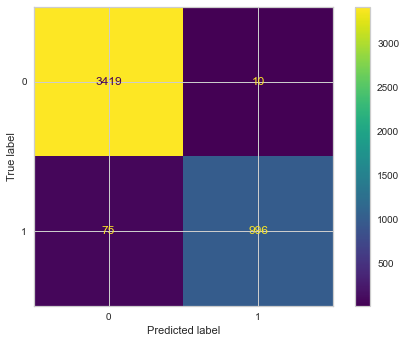

In [89]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report

rf_tuned = RandomForestClassifier(max_depth = 7,max_features = 8,min_samples_split = 2,
        n_estimators = 1000).fit(X_train, y_train)
#rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_tuned,X_test, y_test)

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [91]:
import pickle
pickle.dump(rf_tuned, open("saved_model.pkl", 'wb'))
output_model = pickle.load(open("saved_model.pkl", "rb"))

### Save and Export Variables as .pkl

In [93]:
df_model

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Departments_IT,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [106]:
rf_tuned.feature_importances_

array([3.95692219e-01, 1.07983534e-01, 1.81482121e-01, 1.20162425e-01,
       1.86263257e-01, 2.26334974e-03, 2.67274777e-04, 2.10374877e-03,
       2.37637145e-04, 2.66337033e-04, 3.87847564e-04, 3.04573467e-04,
       2.07552796e-04, 2.09907136e-04, 9.42099904e-05, 5.48663415e-04,
       5.47772765e-04, 9.77569075e-04])

In [99]:
X.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Departments_IT',
       'Departments_RandD', 'Departments_accounting', 'Departments_hr',
       'Departments_management', 'Departments_marketing',
       'Departments_product_mng', 'Departments_sales',
       'Departments_support', 'Departments_technical'], dtype=object)

In [104]:
important_features = pd.Series(data=rf_tuned.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

satisfaction_level        0.40
time_spend_company        0.19
number_project            0.18
average_montly_hours      0.12
last_evaluation           0.11
Work_accident             0.00
salary                    0.00
Departments_technical     0.00
Departments_sales         0.00
Departments_support       0.00
Departments_accounting    0.00
Departments_hr            0.00
promotion_last_5years     0.00
Departments_RandD         0.00
Departments_IT            0.00
Departments_marketing     0.00
Departments_management    0.00
Departments_product_mng   0.00
dtype: float64

In [105]:
# i decided to use all features.i could drop "promotion_last_5years" and "Work_accident"

In [110]:
predict_proba = rf_tuned.predict_proba(X)
predict_proba[:,1]

array([0.98733607, 0.90791014, 0.9865331 , ..., 0.98736695, 0.99241479,
       0.9871166 ])

In [109]:
prediction = rf_tuned.predict(X)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [112]:
df_y_proba = pd.DataFrame(predict_proba[:,1].reshape(-1,),columns=['Churn Probability'])
df_y_proba

,Churn Probability
0,0.99
1,0.91
2,0.99
3,0.90
4,0.99
...,...
14994,0.99
14995,0.99
14996,0.99
14997,0.99


In [115]:
df2 = pd.read_csv('HR_Dataset.csv')
df2.rename({'Departments ':'Departments'}, axis='columns',inplace=True)
df2

df_out = pd.concat([df2.drop('left',axis=1),df_y_proba],axis=1)
df_out

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Churn Probability
0,0.38,0.53,2,157,3,0,0,sales,low,0.99
1,0.80,0.86,5,262,6,0,0,sales,medium,0.91
2,0.11,0.88,7,272,4,0,0,sales,medium,0.99
3,0.72,0.87,5,223,5,0,0,sales,low,0.90
4,0.37,0.52,2,159,3,0,0,sales,low,0.99
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,0.99
14995,0.37,0.48,2,160,3,0,0,support,low,0.99
14996,0.37,0.53,2,143,3,0,0,support,low,0.99
14997,0.11,0.96,6,280,4,0,0,support,low,0.99


In [116]:
df_out.to_csv('df_out.csv')

In [124]:
#!Thanks